In [16]:
# Section 1 - 라이브러리 준비
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter   # 날짜 처리용
import matplotlib.ticker as ticker   # 축 눈금 설정용
%matplotlib inline

In [17]:
# Selection 2 - 데이터 적재 및 특정 국가 데이터 선별
df = pd.read_csv(
     'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv',
     parse_dates=['Date'])
print(f"{len(df)} 행 x {len(df.columns)} 열")

# 분석 대상 국가에 해당하는 행만 선별
countries = ['Korea, South', 'Germany', 'United Kingdom', 'US', 'France']   # 분석 대상 국가 리스트
df = df[df['Country'].isin(countries)]
print(f"{len(df)} 행 x {len(df.columns)} 열")
df.sample(3)

133084 행 x 5 열
3395 행 x 5 열


,Date,Country,Confirmed,Recovered,Deaths
126537,2020-09-21,United Kingdom,401124,2230,41877
45110,2020-11-13,Germany,785093,487913,12404
62537,2020-03-31,"Korea, South",9786,5408,162


In [18]:
# Section 3 - 합계 열 계산
# df ['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis='columns') # (확진자, 회복자, 사망자) 합계
# df ['Cases'] = df[['Deaths']].sum(axis='columns')   # 사망자 수치만 합계에 포함
df ['Cases'] = df[['Confirmed']].sum(axis='columns')   # 확진자 수치만 합계에 포함

df.sample(3)

,Date,Country,Confirmed,Recovered,Deaths,Cases
126552,2020-10-06,United Kingdom,532781,2419,42535,532781
45056,2020-09-20,Germany,273965,241192,9390,273965
63033,2021-08-09,"Korea, South",213987,0,2134,213987


In [19]:
# Section 4 - 데이터 구조 재편
# covie = df.pivot(index='Date', columns='Country', values='Cases')
covid = pd.pivot_table(data=df, index='Date', columns='Country', values='Cases')
covid   # 인덱스 조작의 필요성

Country,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-01-22,0,0,1,1,0
2020-01-23,0,0,1,1,0
2020-01-24,2,0,2,2,0
2020-01-25,3,0,2,2,0
2020-01-26,3,0,3,5,0
...,...,...,...,...,...
2021-11-26,7654128,5735837,436968,48176523,10125945
2021-11-27,7654160,5780814,440896,48201079,10165779
2021-11-28,7723032,5804139,444200,48229210,10202370


In [20]:
# 피벗 테이블을 일반 데이터프레임으로 변환하기를 원함
# 인덱스 열 제목 위에 있는 "Country"를 제거하여 일반 데이터 프레임으로 변경하기를 원함
covid.sample(3) # 피벗 테이블 형태임

Country,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2021-09-19,7043875,4149832,287536,42137162,7464791
2020-08-03,230665,212111,14423,4716762,307251
2021-05-26,5683143,3667041,138311,33270365,4486168


In [21]:
covid.columns

Index(['France', 'Germany', 'Korea, South', 'US', 'United Kingdom'], dtype='object', name='Country')

In [22]:
# 필요한 특정 열만 columns로 지정하면, 피벗 테이블이 일반 데이터프레임으로 변환됨
covid.columns = covid.columns.to_list()   # 분석 대상 국가 리스트
covid.sample(3) # 일반 데이터프레임으로 변환된 형태임

,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-02-16,12,16,29,14,18
2020-07-09,209420,199001,13338,3124656,289154
2020-07-12,210402,199919,13479,3314487,291154


In [26]:
# 인구 데이터 읽어오기
pop = pd.read_csv(
     './population_by_country_2020.csv', usecols=["Country (or dependency)", "Population (2020)"])
pop.head()

,Country (or dependency),Population (2020)
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785


In [27]:
# 열 이름 변경
pop.rename(columns = {'Country (or dependency)' : 'Country', 'Population (2020)' : 'Population'}, inplace = True)
pop.head()

,Country,Population
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785


In [28]:
countries

['Korea, South', 'Germany', 'United Kingdom', 'US', 'France']

In [31]:
# 분석 대상 국가만 추출
pop = pop[
    pop['Country'].isin(countries)                          # 코로나 데이터와 인구 데이터에서 국가명이 동일한 경우
    |                                                       # 또는
    pop['Country'].isin(['United States', 'South Korea'])  # 코로나 데이터와 인구 데이터에서 국가명이 상이한 경우
]
pop

,Country,Population
2,United States,331341050
18,Germany,83830972
20,United Kingdom,67948282
21,France,65298930
27,South Korea,51276977


In [32]:
# 인구 데이터의 국가 이름을 코로나 데이터 기준으로 변경
pop = pop.replace({'United States' : 'US', 'South Korea' : 'Korea, South'})

# Country 열을 인덱스로 설정
pop.set_index(['Country'], inplace=True)
pop

,Population
Country,
US,331341050
Germany,83830972
United Kingdom,67948282
France,65298930
"Korea, South",51276977


In [33]:
# 사전으로 변환
pop = pop.to_dict()
pop

{'Population': {'US': 331341050,
  'Germany': 83830972,
  'United Kingdom': 67948282,
  'France': 65298930,
  'Korea, South': 51276977}}

In [34]:
# 사전의 내용만 추출하여 populations 데이터프레임으로 저장
populations = pop['Population']
populations

{'US': 331341050,
 'Germany': 83830972,
 'United Kingdom': 67948282,
 'France': 65298930,
 'Korea, South': 51276977}

In [35]:
# Section 5 - 백명당 비율 계산

percapita = covid.copy()
percapita

,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-01-22,0,0,1,1,0
2020-01-23,0,0,1,1,0
2020-01-24,2,0,2,2,0
2020-01-25,3,0,2,2,0
2020-01-26,3,0,3,5,0
...,...,...,...,...,...
2021-11-26,7654128,5735837,436968,48176523,10125945
2021-11-27,7654160,5780814,440896,48201079,10165779
2021-11-28,7723032,5804139,444200,48229210,10202370


In [36]:
for country in percapita.columns.to_list():   # list(percapita.columns)
    percapita[country] = (percapita[country] / populations[country] * 100).round(2)
    
percapita.sample(3)

,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-08-20,0.41,0.28,0.03,1.68,0.48
2021-10-05,10.92,5.10,0.63,13.28,11.78
2021-11-05,11.18,5.67,0.74,14.02,13.67


In [37]:
covid.sample(5).sort_values('Date')

,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-05-17,181703,176369,11065,1495976,231232
2020-07-17,214009,202045,13711,3654708,294803
2020-08-22,277763,233861,17399,5666825,326595
2020-11-20,2161970,914118,30403,12047450,1477217
2021-10-27,7242180,4545665,358412,45773574,8938965


In [38]:
# 열별 최대값 확인
covid.max()

France             7778575
Germany            5923564
Korea, South        452350
US                48554890
United Kingdom    10285745
dtype: int64

In [39]:
# 열별 최대값의 최대값 확인
covid.max().max()

48554890

In [40]:
countries

['Korea, South', 'Germany', 'United Kingdom', 'US', 'France']

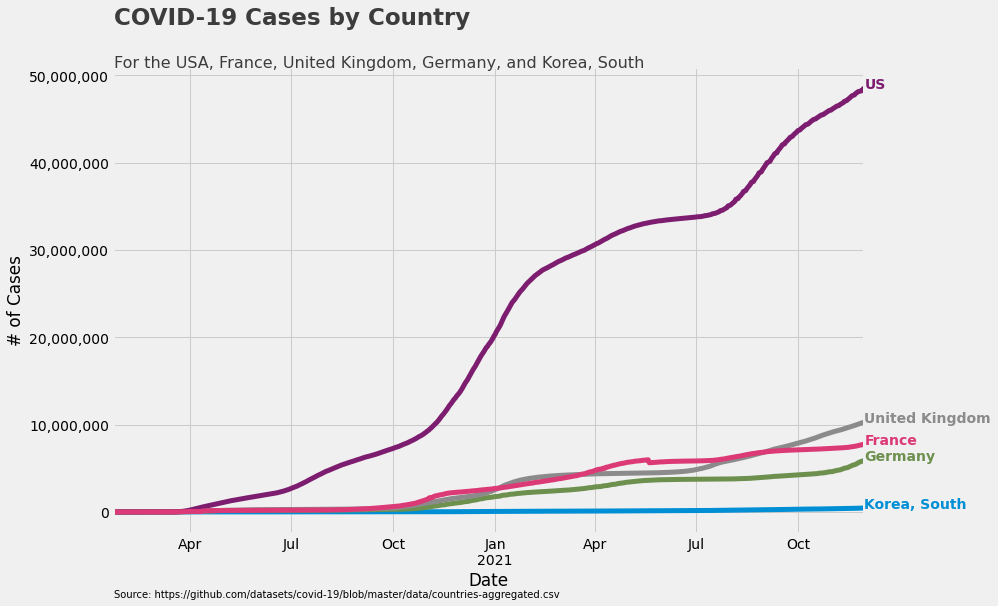

In [51]:
# Section 6 - 색상과 스타일 지정
colors = {'Korea, South' : '#008fd5', 'France' : '#DC3977', 'Germany' : '#6d904f', 'US' : '#7C1D6F', 'United Kingdom' : '#8b8b8b'}
plt.style.use('fivethirtyeight')   # 538 스타일

# Section 7 - 꺾은선 출력
# 원 코드의 선과 레이블 색상이 맞지 않는 문제를 해결한 코드

ax = plt.gca()   # get current axis
for country in countries:    # 5개 국가에 대하여 반복
    covid[country].plot(
    figsize=(12,8),
    color=colors[country],
    linewidth=5,
    legend=False,
    ax=ax,)
    
# matplotlib.ticker에서 제공되는 StrMethodFormatter()로 천단위 구분 쉼표를 추가
ax.yaxis.set_major_formatter (
    ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel('Date')   # 축 레이블 지정
ax.set_ylabel('# of Cases')

# Section 8 - 국가 이름 출력
for country in list(colors.keys()):
    ax.text(   # 국가 이름 출력
        x = covid.index[-1],   # covid.index 항목의 끝, 즉 최근 날짜
        y = covid[country].max(),   # covid[country] 열 값의 최대치(점점 증가하는 값이므로 마지막 값)
        color = colors[country],   # 색상
        s = country,   # str, 즉 출력할 문자열
        weight = 'bold')   # 글자 무게
    
# Section 9 - 제목 추가
main_title = "COVID-19 Cases by Country"
ax.text(   # 주 제목 출력
    x = covid.index[1],   # x 축에서 둘째 날짜에 해당하는 위치
    y = covid.max().max()*1.15,   # y 축 전체 최대치보다 15% 큰 위치
    s = main_title,   # str, 즉 출력할 문자열
    fontsize = 23,   # 글꼴 크기
    weight = 'bold',   # 글꼴 무게
    alpha = .75   # 투명도
)

sub_title = "For the USA, France, United Kingdom, Germany, and Korea, South"
ax.text(   # 부 제목 출력
    x = covid.index[1],   # x 축에서 둘째 날짜에 해당하는 위치
    y = covid.max().max()*1.05,   # y 축 전체 최대치보다 5% 큰 위치
    s = sub_title,   # str, 출력할 부 제목 문자열
    fontsize = 16,   # 글꼴 크기
    alpha = .75   # 투명도
)

data_source = 'Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv'
ax.text(   # 데이터 출처 출력
    x = percapita.index[1],   # x 축에서 둘째 날짜에 해당하는 위치
    y = -int(covid.max().max())/5,   # y 축에서 0 눈금선 아래로 적당한 위치
    s = data_source,   # str, 출력할 데이터 출처 문자열
    fontsize = 10   # 글꼴 크기
)

plt.show()

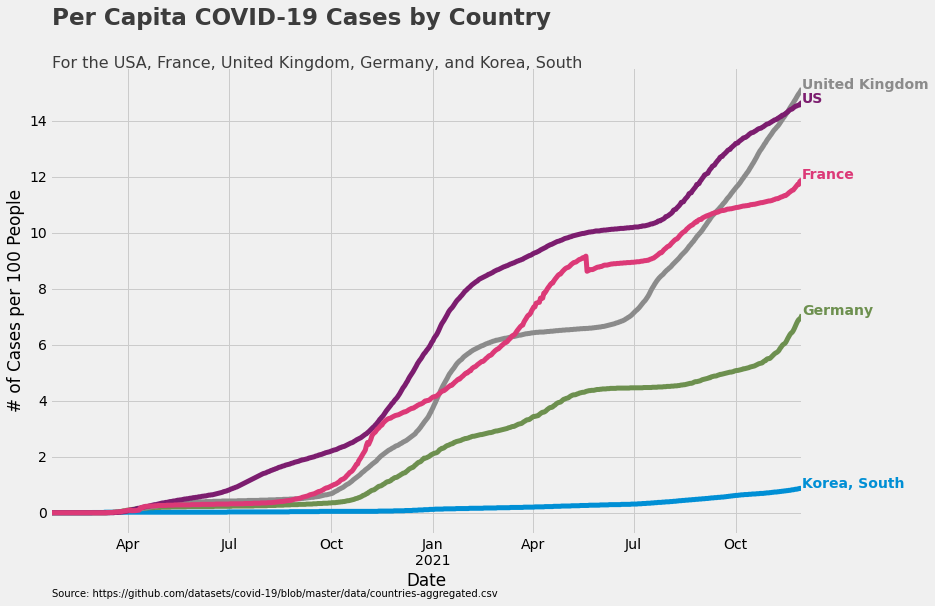

In [53]:
# Section 6 - 색상과 스타일 지정
colors = {'Korea, South' : '#008fd5', 'France' : '#DC3977', 'Germany' : '#6d904f', 'US' : '#7C1D6F', 'United Kingdom' : '#8b8b8b'}
plt.style.use('fivethirtyeight')   # 538 스타일

# Section 7 - 꺾은선 출력
# 원 코드의 선과 레이블 색상이 맞지 않는 문제를 해결한 코드

ax = plt.gca()   # get current axis
for country in countries:    # 5개 국가에 대하여 반복
    percapita[country].plot(
    figsize=(12,8),
    color=colors[country],
    linewidth=5,
    legend=False,
    ax=ax,)
    
# matplotlib.ticker에서 제공되는 StrMethodFormatter()로 천단위 구분 쉼표를 추가
ax.yaxis.set_major_formatter (
    ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel('Date')   # 축 레이블 지정
ax.set_ylabel('# of Cases per 100 People')

# Section 8 - 국가 이름 출력
for country in list(colors.keys()):
    ax.text(   # 국가 이름 출력
        x = percapita.index[-1],   # covid.index 항목의 끝, 즉 최근 날짜
        y = percapita[country].max(),   # covid[country] 열 값의 최대치(점점 증가하는 값이므로 마지막 값)
        color = colors[country],   # 색상
        s = country,   # str, 즉 출력할 문자열
        weight = 'bold')   # 글자 무게
    
# Section 9 - 제목 추가
main_title = "Per Capita COVID-19 Cases by Country"
ax.text(   # 주 제목 출력
    x = percapita.index[1],   # x 축에서 둘째 날짜에 해당하는 위치
    y = percapita.max().max()*1.15,   # y 축 전체 최대치보다 15% 큰 위치
    s = main_title,   # str, 즉 출력할 문자열
    fontsize = 23,   # 글꼴 크기
    weight = 'bold',   # 글꼴 무게
    alpha = .75   # 투명도
)

sub_title = "For the USA, France, United Kingdom, Germany, and Korea, South"
ax.text(   # 부 제목 출력
    x = percapita.index[1],   # x 축에서 둘째 날짜에 해당하는 위치
    y = percapita.max().max()*1.05,   # y 축 전체 최대치보다 5% 큰 위치
    s = sub_title,   # str, 출력할 부 제목 문자열
    fontsize = 16,   # 글꼴 크기
    alpha = .75   # 투명도
)

data_source = 'Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv'
ax.text(   # 데이터 출처 출력
    x = percapita.index[1],   # x 축에서 둘째 날짜에 해당하는 위치
    y = -int(percapita.max().max())/5,   # y 축에서 0 눈금선 아래로 적당한 위치
    s = data_source,   # str, 출력할 데이터 출처 문자열
    fontsize = 10   # 글꼴 크기
)

plt.show()

In [58]:
# 함수 정의
def chart(df, is_rate=False):
    ax = plt.gca()   # get current axis
    for country in countries:
        df[country].plot(
        figsize=(12, 8),
        color=colors[country],
        linewidth=5,
        legend=False,
        ax=ax,)
        
    if not is_rate:   # 건수 기준일 때만 적용
        # matplotlib.ticker에서 제공되는 StrMethodFormatter()로 천단위 구분 쉼표를 추가
        ax.yaxis.set_major_formatter(
            ticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.set_xlabel('Date')
    if is_rate:
        ax.set_ylabel('# of Cases per 100 People')
        title = "Per Capita COVID-19 Cases by Country"
    else:
        ax.set_ylabel('# of Cases')
        title = "COVID-19 Cases by Country"
        
    for country in list(colors.keys()):
        ax.text(
            x = df.index[-1],   # df.index 항목의 끝, 즉 마지막에 해당하는 날짜
            y = df[country].max(),   # df[country] 열 값의 최대치(점점 증가하는 값이므로 마지막 값)
            color = colors[country],
            s = country,
            weight = 'bold')
        
        ax.text(
            x = df.index[1],   # 둘째 날짜
            y = df.max().max()*1.15,   # int(df.max().max())*1.15,   # 전체 값의 최대치보다 15% 큰 위치
            s = title,
            fontsize = 23, 
            weight = 'bold',
            alpha = .75
        )
        
        ax.text(
            x = df.index[1],
            y = df.max().max()*1.06,
            s = "For the USA, France, United Kingdom, Germany, and Korea, South",
            fontsize = 16, 
            alpha = .75
        )
        
        return ax

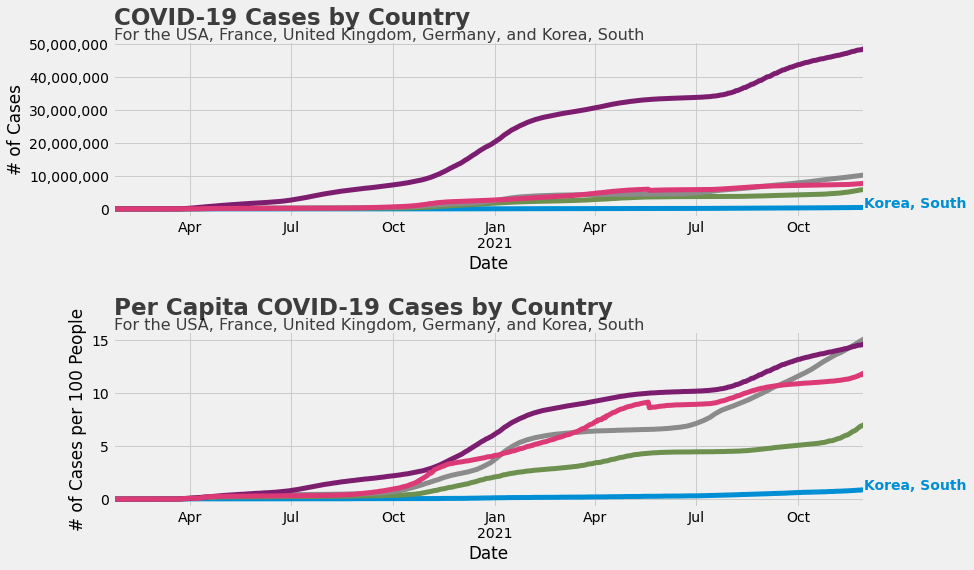

In [63]:
# 상하 차트 간의 여백이 부족한 경우
from matplotlib import gridspec

fig = plt.figure(figsize=(10, 35))
gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[15, 5, 15])   # 3행 1열 그리드

ax0 = plt.subplot(gs[0])
chart(covid)

ax2 = plt.subplot(gs[2])
chart(percapita, is_rate=True)

plt.show()